## Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import earthpy as ep
import branca.colormap as cm
import folium

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline
plt.style.use("fivethirtyeight")

In [3]:
data = pd.read_csv('data/sudan_raw_data.csv')
data.head()

,year(العام),state_nam,locality_nam,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,Number_of_students_by_grade,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,Number_of_repeaters_by_grade,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,Pupils_below_5,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,Pupils_above_14,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,Teachers_with_diploma,MTWHD,FTWHD,Teachers_with_uni,MTWUD,FTWUD,Military_service_volunteers,MTVNS,FTVNS,MS,ML,Science_textbooks,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,Math_textbooks,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,Arabic_textbooks,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,English_textbooks,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Number_of_students_that_passed,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number
0,2018_2019,River Nile,albuhayra,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,NaN,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,NaN,0,0,NaN,2,13,NaN,0,0,0,5,NaN,0,0,15,0,25,20,15,15,NaN,22,26,17,0,20,19,13,17,NaN,24,20,15,0,21,24,20,20,NaN,0,0,25,0,16,18,18,16,19,0,NaN,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0.0,7.0,0.0,0,no,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730.0
1,2018_2019,Northern,murwi,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,NaN,1,2,NaN,4,90,NaN,0,1,0,4,NaN,0,0,0,0,6,9,7,11,NaN,0,20,0,0,13,9,7,10,NaN,0,18,0,0,12,6,7,12,NaN,0,0,0,0,5,5,20,6,2,0,NaN,2,0,6,2,0,8,public_network,network,yes,yes,yes,1.0,7.0,0.0,0,no,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932.0
2,2018_2019,Northern,murwi,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,NaN,0,0,NaN,5,10,NaN,0,0,0,3,NaN,0,0,13,15,20,13,12,0,NaN,25,15,17,15,19,22,16,0,NaN,26,16,14,13,15,11,12,0,NaN,0,0,10,15,17,15,12,0,0,0,NaN,0,0,9,0,0,9,public_network,network,yes,yes,yes,0.0,10.0,0.0,0,yes,indevedual,0.0,15.0,0.0,0.0,0.0,0.0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404.0
3,2018_2019,Northern,murwi,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,NaN,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,NaN,3,8,NaN,3,3,NaN,1,0,0,5,NaN,0,0,6,8,15,9,8,4,NaN,0,0,2,6,15,8,8,5,NaN,15,6,7,

In [4]:
data.rename(columns={"state_nam": 'State', "locality_nam": "District"}, inplace=True)
data.head()

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,Number_of_students_by_grade,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,Number_of_repeaters_by_grade,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,Pupils_below_5,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,Pupils_above_14,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,Teachers_with_diploma,MTWHD,FTWHD,Teachers_with_uni,MTWUD,FTWUD,Military_service_volunteers,MTVNS,FTVNS,MS,ML,Science_textbooks,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,Math_textbooks,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,Arabic_textbooks,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,English_textbooks,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Number_of_students_that_passed,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number
0,2018_2019,River Nile,albuhayra,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,NaN,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,NaN,0,0,NaN,2,13,NaN,0,0,0,5,NaN,0,0,15,0,25,20,15,15,NaN,22,26,17,0,20,19,13,17,NaN,24,20,15,0,21,24,20,20,NaN,0,0,25,0,16,18,18,16,19,0,NaN,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0.0,7.0,0.0,0,no,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730.0
1,2018_2019,Northern,murwi,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,NaN,1,2,NaN,4,90,NaN,0,1,0,4,NaN,0,0,0,0,6,9,7,11,NaN,0,20,0,0,13,9,7,10,NaN,0,18,0,0,12,6,7,12,NaN,0,0,0,0,5,5,20,6,2,0,NaN,2,0,6,2,0,8,public_network,network,yes,yes,yes,1.0,7.0,0.0,0,no,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932.0
2,2018_2019,Northern,murwi,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,NaN,0,0,NaN,5,10,NaN,0,0,0,3,NaN,0,0,13,15,20,13,12,0,NaN,25,15,17,15,19,22,16,0,NaN,26,16,14,13,15,11,12,0,NaN,0,0,10,15,17,15,12,0,0,0,NaN,0,0,9,0,0,9,public_network,network,yes,yes,yes,0.0,10.0,0.0,0,yes,indevedual,0.0,15.0,0.0,0.0,0.0,0.0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404.0
3,2018_2019,Northern,murwi,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,NaN,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,NaN,3,8,NaN,3,3,NaN,1,0,0,5,NaN,0,0,6,8,15,9,8,4,NaN,0,0,2,6,15,8,8,5,NaN,15,6,7,8,0,6,7,

In [5]:
list(data.columns)

['year(العام)',
 'State',
 'District',
 'school_nam',
 'MOEcode',
 'location',
 'lat',
 'lon',
 'Type',
 'status2',
 'Status',
 'kindergarten',
 'kinder_levle1',
 'kinder_levle2',
 'Number_of_students_by_grade',
 'CYBB1',
 'CYGB1',
 'CYBB1NGK',
 'CYGB1NGK',
 'CYBB2',
 'CYGB2',
 'CYBB3',
 'CYGB3',
 'CYBB4',
 'CYGB4',
 'CYBB5',
 'CYGB5',
 'CYBB6',
 'CYGB6',
 'CYBB7',
 'CYGB7',
 'CYBB8',
 'CYGB8',
 'Number_of_repeaters_by_grade',
 'RYBB1',
 'RYGB1',
 'RYBB1NGK',
 'RYGB1NGK',
 'RYBB2',
 'RYGB2',
 'RYBB3',
 'RYGB3',
 'RYBB4',
 'RYGB4',
 'RYBB5',
 'RYGB5',
 'RYBB6',
 'RYGB6',
 'RYBB7',
 'RYGB7',
 'RYBB8',
 'RYGB8',
 'Pupils_below_5',
 'CYBBU1',
 'CYGBU1',
 'CYBBU1NGK',
 'CYGBU1NGK',
 'CYBBU2',
 'CYGBU2',
 'Pupils_above_14',
 'CYBBO1',
 'CYGBO1',
 'CYBBO1NGK',
 'CYGBO1NGK',
 'CYBBO2',
 'CYGBO2',
 'CYBBO3',
 'CYGBO3',
 'CYBBO4',
 'CYGBO4',
 'CYBBO5',
 'CYGBO5',
 'CYBBO6',
 'CYGBO6',
 'CYBBO7',
 'CYGBO7',
 'CYBBO8',
 'CYGBO8',
 'B1_Available_seats',
 'B2_Available_seats',
 'B3_Available_seats',

In [6]:
data.drop(columns=['Teachers_with_diploma', 'Teachers_with_uni', 'Military_service_volunteers', 'Science_textbooks', 'Math_textbooks', 'Arabic_textbooks', 'English_textbooks', 'Number_of_students_that_passed', 'Pupils_above_14', 'Pupils_below_5', 'Number_of_repeaters_by_grade', 'Number_of_students_by_grade'], inplace=True)
data.head()

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,MTWHD,FTWHD,MTWUD,FTWUD,MTVNS,FTVNS,MS,ML,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number
0,2018_2019,River Nile,albuhayra,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,0,0,2,13,0,0,0,5,0,0,15,0,25,20,15,15,22,26,17,0,20,19,13,17,24,20,15,0,21,24,20,20,0,0,25,0,16,18,18,16,19,0,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0.0,7.0,0.0,0,no,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730.0
1,2018_2019,Northern,murwi,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,1,2,4,90,0,1,0,4,0,0,0,0,6,9,7,11,0,20,0,0,13,9,7,10,0,18,0,0,12,6,7,12,0,0,0,0,5,5,20,6,2,0,2,0,6,2,0,8,public_network,network,yes,yes,yes,1.0,7.0,0.0,0,no,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932.0
2,2018_2019,Northern,murwi,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,0,0,5,10,0,0,0,3,0,0,13,15,20,13,12,0,25,15,17,15,19,22,16,0,26,16,14,13,15,11,12,0,0,0,10,15,17,15,12,0,0,0,0,0,9,0,0,9,public_network,network,yes,yes,yes,0.0,10.0,0.0,0,yes,indevedual,0.0,15.0,0.0,0.0,0.0,0.0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404.0
3,2018_2019,Northern,murwi,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,3,8,3,3,1,0,0,5,0,0,6,8,15,9,8,4,0,0,2,6,15,8,8,5,15,6,7,8,0,6,7,10,0,0,6,7,8,5,9,4,15,0,14,0,8,0,0,8,public_network,network,yes,yes,yes,1.0,7.0,0.0,0,yes,indevedual,0.0,30.0,0.0,0.0,0.0,0.0,60000,30000,0,0,0,0,0,30000,0,1553411047305.jpg,عمر عبد المجيد عطا السيد,111279873.0
4,2018_2019,Northern,murwi,مروي شرق بنين,11101304.0,urban,18.483851,31.800364,boys,yes,nomads_idbs,yes,22.0,27.0,26,0,0,0,26,0,28,0,23,0,25,0,28,0,17,0,11,0,0,0,0,0,3,0,2,0,5,0,6,0,3,0,7,0,7,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
# fixing data types
data.Latrine_common = data.Latrine_common.astype('Int32')
data.Latrine_male = data.Latrine_male.astype('Int32')
data.Latrine_female = data.Latrine_female.astype('Int32')
data.Girls_Feeding = data.Girls_Feeding.astype('Int32')
data.Boys_Feeding = data.Boys_Feeding.astype('Int32')
data.refugee_male = data.refugee_male.astype('Int32')
data.refugee_female = data.refugee_female.astype('Int32')
data.IDP_male = data.IDP_male.astype('Int32')
data.IDP_female = data.IDP_female.astype('Int32')
data.Head_Teacher_Cellphone_Number = data.Head_Teacher_Cellphone_Number.astype('Int32').astype(str)

In [8]:
# get values for Status
data.Status.value_counts()

day_school       18725
nomads_idbs       1049
Write              318
quaranic           180
complementary      102
special_needs       58
Name: Status, dtype: int64

In [9]:
# get values for Type
data.Type.value_counts()

mixed    9452
boys     5547
girls    5433
Name: Type, dtype: int64

In [10]:
# get values for Potable Water Source
data.Potable_Water_source.value_counts()

public_network    9998
well              3843
other             3556
no_water_suppl    1707
pump              1328
Name: Potable_Water_source, dtype: int64

In [11]:
# get values for electricity
data.electricity.value_counts()

no_electricity    9964
network           9548
solar_power        588
generator          332
Name: electricity, dtype: int64

In [12]:
data.feeding_fund.value_counts()

WFP           1989
indevedual    1512
states         293
Name: feeding_fund, dtype: int64

In [13]:
data.head()

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,MTWHD,FTWHD,MTWUD,FTWUD,MTVNS,FTVNS,MS,ML,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number
0,2018_2019,River Nile,albuhayra,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,0,0,2,13,0,0,0,5,0,0,15,0,25,20,15,15,22,26,17,0,20,19,13,17,24,20,15,0,21,24,20,20,0,0,25,0,16,18,18,16,19,0,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730
1,2018_2019,Northern,murwi,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,1,2,4,90,0,1,0,4,0,0,0,0,6,9,7,11,0,20,0,0,13,9,7,10,0,18,0,0,12,6,7,12,0,0,0,0,5,5,20,6,2,0,2,0,6,2,0,8,public_network,network,yes,yes,yes,1,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932
2,2018_2019,Northern,murwi,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,0,0,5,10,0,0,0,3,0,0,13,15,20,13,12,0,25,15,17,15,19,22,16,0,26,16,14,13,15,11,12,0,0,0,10,15,17,15,12,0,0,0,0,0,9,0,0,9,public_network,network,yes,yes,yes,0,10,0,0,yes,indevedual,0,15,0,0,0,0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404
3,2018_2019,Northern,murwi,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,3,8,3,3,1,0,0,5,0,0,6,8,15,9,8,4,0,0,2,6,15,8,8,5,15,6,7,8,0,6,7,10,0,0,6,7,8,5,9,4,15,0,14,0,8,0,0,8,public_network,network,yes,yes,yes,1,7,0,0,yes,indevedual,0,30,0,0,0,0,60000,30000,0,0,0,0,0,30000,0,1553411047305.jpg,عمر عبد المجيد عطا السيد,111279873
4,2018_2019,Northern,murwi,مروي شرق بنين,11101304.0,urban,18.483851,31.800364,boys,yes,nomads_idbs,yes,22.0,27.0,26,0,0,0,26,0,28,0,23,0,25,0,28,0,17,0,11,0,0,0,0,0,3,0,2,0,5,0,6,0,3,0,7,0,7,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,20,23,26,19,19,25,10,11,1,1,1,1,4,1,1,1,0,1,4,10,0,1,0

In [14]:
# replace State values to match shapefile
data.State.replace({"Gadarif": "Gedaref", "Gezira": "Aj Jazirah", "Sinnar": "Sennar"}, inplace=True)
data.head()

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,MTWHD,FTWHD,MTWUD,FTWUD,MTVNS,FTVNS,MS,ML,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number
0,2018_2019,River Nile,albuhayra,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,0,0,2,13,0,0,0,5,0,0,15,0,25,20,15,15,22,26,17,0,20,19,13,17,24,20,15,0,21,24,20,20,0,0,25,0,16,18,18,16,19,0,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730
1,2018_2019,Northern,murwi,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,1,2,4,90,0,1,0,4,0,0,0,0,6,9,7,11,0,20,0,0,13,9,7,10,0,18,0,0,12,6,7,12,0,0,0,0,5,5,20,6,2,0,2,0,6,2,0,8,public_network,network,yes,yes,yes,1,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932
2,2018_2019,Northern,murwi,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,0,0,5,10,0,0,0,3,0,0,13,15,20,13,12,0,25,15,17,15,19,22,16,0,26,16,14,13,15,11,12,0,0,0,10,15,17,15,12,0,0,0,0,0,9,0,0,9,public_network,network,yes,yes,yes,0,10,0,0,yes,indevedual,0,15,0,0,0,0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404
3,2018_2019,Northern,murwi,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,3,8,3,3,1,0,0,5,0,0,6,8,15,9,8,4,0,0,2,6,15,8,8,5,15,6,7,8,0,6,7,10,0,0,6,7,8,5,9,4,15,0,14,0,8,0,0,8,public_network,network,yes,yes,yes,1,7,0,0,yes,indevedual,0,30,0,0,0,0,60000,30000,0,0,0,0,0,30000,0,1553411047305.jpg,عمر عبد المجيد عطا السيد,111279873
4,2018_2019,Northern,murwi,مروي شرق بنين,11101304.0,urban,18.483851,31.800364,boys,yes,nomads_idbs,yes,22.0,27.0,26,0,0,0,26,0,28,0,23,0,25,0,28,0,17,0,11,0,0,0,0,0,3,0,2,0,5,0,6,0,3,0,7,0,7,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,20,23,26,19,19,25,10,11,1,1,1,1,4,1,1,1,0,1,4,10,0,1,0

# Number of schools by state

In [15]:
# get counts by State
data.State.value_counts()

Khartoum          4523
Aj Jazirah        2465
North Kordofan    1557
South Darfur      1523
West Kordofan     1220
North Darfur      1162
White Nile        1100
River Nile         904
Gedaref            893
Kassala            880
Sennar             844
South Kordofan     634
Northern           554
Red Sea            520
East Darfur        472
West Darfur        465
Blue Nile          365
Central Darfur     351
Name: State, dtype: int64

In [16]:
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='State', ylabel='count'>

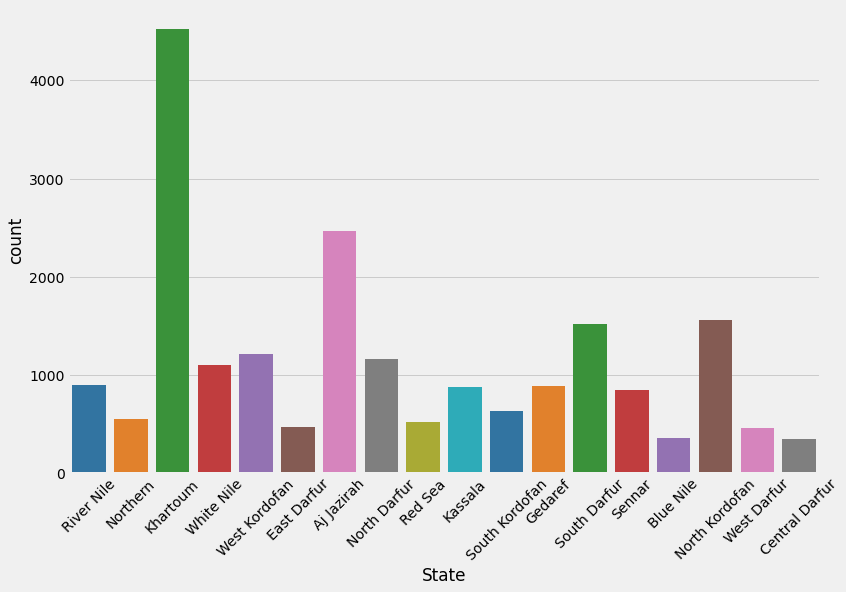

In [17]:
plt.figure(figsize =(12,8))
plt.xticks(rotation=45)
sns.countplot(data = data, x= 'State', palette='tab10')

<AxesSubplot:xlabel='location', ylabel='count'>

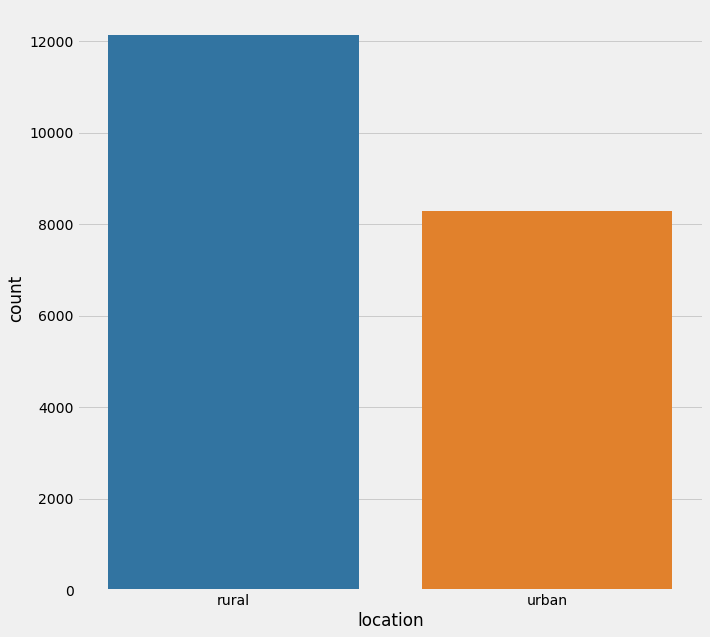

In [18]:
plt.figure(figsize=(10,10))

sns.countplot(data=data, x='location', palette='tab10')

<AxesSubplot:xlabel='count', ylabel='State'>

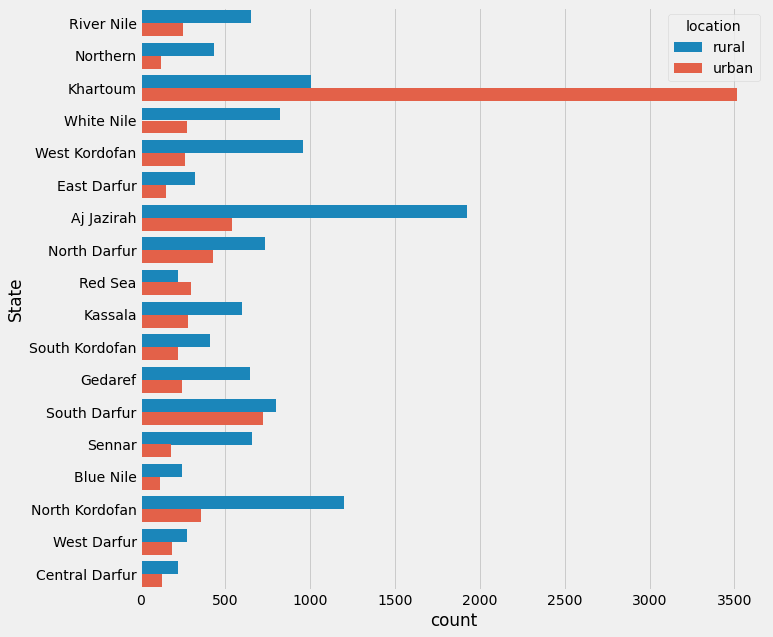

In [19]:
plt.figure(figsize=(10,10))

sns.countplot(data=data, y='State', hue='location')


<AxesSubplot:xlabel='Type', ylabel='count'>

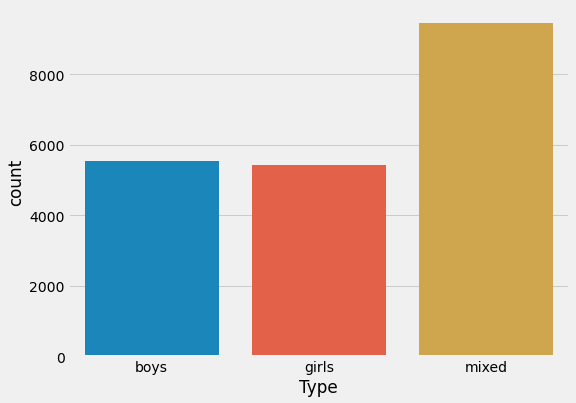

In [20]:
plt.figure(figsize = (8,6))
sns.countplot(data=data, x='Type')

<AxesSubplot:xlabel='location', ylabel='count'>

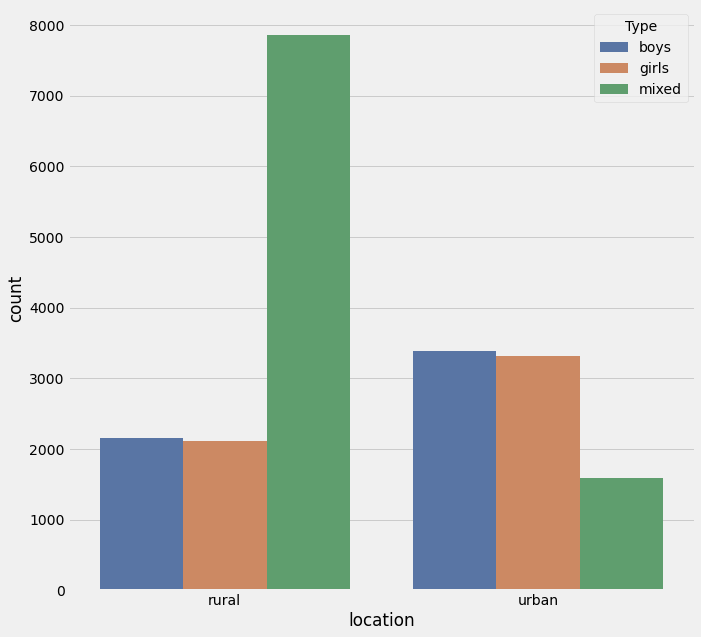

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(data=data, x='location', hue='Type', palette=sns.color_palette("deep", 8))

In [22]:
df2 = data[['lat','lon']].copy()

In [23]:
df2['count']=1

In [24]:
df2.describe()

,lat,lon,count
count,14757.000000,14757.000000,20432.0
mean,18.971676,25.863494,1.0
std,9.504482,9.736470,0.0
min,-69.975691,-69.646219,1.0
25%,13.603951,15.352976,1.0
50%,14.735648,30.140445,1.0
75%,25.277009,33.305993,1.0
max,98.679485,111.024720,1.0


In [25]:
df2.lat = df2.lat/10
df2.lon = df2.lon/10
df2 = df2.dropna(0)
df2.lat = df2.lat.astype(int)
df2.lon = df2.lon.astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14757 entries, 1 to 20431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   lat     14757 non-null  int64
 1   lon     14757 non-null  int64
 2   count   14757 non-null  int64
dtypes: int64(3)
memory usage: 461.2 KB


In [26]:
df2 = df2.groupby(['lat','lon'], as_index=False).count()
df_p2 = pd.pivot_table(df2,'count','lat','lon')

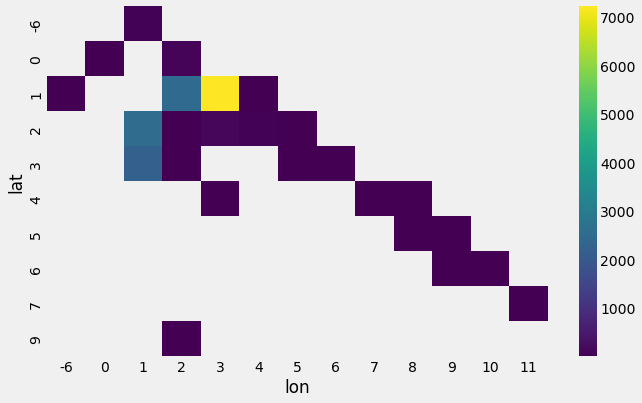

In [27]:
plt.figure(figsize = [10, 6])
sns.heatmap(df_p2,
           cmap = 'viridis');

## Feature Engineering

In [28]:
list(data.columns)

['year(العام)',
 'State',
 'District',
 'school_nam',
 'MOEcode',
 'location',
 'lat',
 'lon',
 'Type',
 'status2',
 'Status',
 'kindergarten',
 'kinder_levle1',
 'kinder_levle2',
 'CYBB1',
 'CYGB1',
 'CYBB1NGK',
 'CYGB1NGK',
 'CYBB2',
 'CYGB2',
 'CYBB3',
 'CYGB3',
 'CYBB4',
 'CYGB4',
 'CYBB5',
 'CYGB5',
 'CYBB6',
 'CYGB6',
 'CYBB7',
 'CYGB7',
 'CYBB8',
 'CYGB8',
 'RYBB1',
 'RYGB1',
 'RYBB1NGK',
 'RYGB1NGK',
 'RYBB2',
 'RYGB2',
 'RYBB3',
 'RYGB3',
 'RYBB4',
 'RYGB4',
 'RYBB5',
 'RYGB5',
 'RYBB6',
 'RYGB6',
 'RYBB7',
 'RYGB7',
 'RYBB8',
 'RYGB8',
 'CYBBU1',
 'CYGBU1',
 'CYBBU1NGK',
 'CYGBU1NGK',
 'CYBBU2',
 'CYGBU2',
 'CYBBO1',
 'CYGBO1',
 'CYBBO1NGK',
 'CYGBO1NGK',
 'CYBBO2',
 'CYGBO2',
 'CYBBO3',
 'CYGBO3',
 'CYBBO4',
 'CYGBO4',
 'CYBBO5',
 'CYGBO5',
 'CYBBO6',
 'CYGBO6',
 'CYBBO7',
 'CYGBO7',
 'CYBBO8',
 'CYGBO8',
 'B1_Available_seats',
 'B2_Available_seats',
 'B3_Available_seats',
 'B4_Available_seats',
 'B5_Available_seats',
 'B6_Available_seats',
 'B7_Available_seats',
 'B8_Availa

In [29]:
data['Avail_Seats'] = data.iloc[:, 74:82].sum(axis=1)
data['Tot_Mil_Vol'] = data.iloc[:, 94:98].sum(axis=1)
data['Total_Graduated'] = data.Graduated_Girls + data.Graduated_Boys
data['Total_Teach_Dipl'] = data['MTWHD'] + data['FTWHD']
data['Total_Teach_Uni'] = data.MTWUD + data.FTWUD
data['Total_Teachers'] = data['Total_Teach_Dipl'] + data['Total_Teach_Uni']
data['Total_Students'] = data.iloc[:, 14:32].sum(axis=1)
data['Total_Repeaters'] = data.iloc[:, 32:50].sum(axis=1)
data['Total_Science'] = data.iloc[:, 98:106].sum(axis=1)
data['Total_Math'] = data.iloc[:, 106:114].sum(axis=1)
data['Total_Arabic'] = data.iloc[:, 114:122].sum(axis=1)
data['Total_English'] = data.iloc[:, 122:130].sum(axis=1)
data['Total_Under_5'] = data.iloc[:, 50:56].sum(axis=1)
data['Total_Over_14'] = data.iloc[:, 56:74].sum(axis=1)

In [30]:
data.isna().sum()

year(العام)                          0
State                                0
District                             0
school_nam                           0
MOEcode                              0
location                             0
lat                               5675
lon                               5675
Type                                 0
status2                              0
Status                               0
kindergarten                       518
kinder_levle1                    15341
kinder_levle2                    15342
CYBB1                                0
CYGB1                                0
CYBB1NGK                             0
CYGB1NGK                             0
CYBB2                                0
CYGB2                                0
CYBB3                                0
CYGB3                                0
CYBB4                                0
CYGB4                                0
CYBB5                                0
CYGB5                    

## Mapping with Geopandas

In [31]:
data.head()

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,MTWHD,FTWHD,MTWUD,FTWUD,MTVNS,FTVNS,MS,ML,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number,Avail_Seats,Tot_Mil_Vol,Total_Graduated,Total_Teach_Dipl,Total_Teach_Uni,Total_Teachers,Total_Students,Total_Repeaters,Total_Science,Total_Math,Total_Arabic,Total_English,Total_Under_5,Total_Over_14
0,2018_2019,River Nile,albuhayra,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,0,0,2,13,0,0,0,5,0,0,15,0,25,20,15,15,22,26,17,0,20,19,13,17,24,20,15,0,21,24,20,20,0,0,25,0,16,18,18,16,19,0,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730,186,5,19,0,15,15,186,22,90,134,144,93,0,0
1,2018_2019,Northern,murwi,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,1,2,4,90,0,1,0,4,0,0,0,0,6,9,7,11,0,20,0,0,13,9,7,10,0,18,0,0,12,6,7,12,0,0,0,0,5,5,20,6,2,0,2,0,6,2,0,8,public_network,network,yes,yes,yes,1,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932,73,5,2,3,94,97,104,13,33,59,55,36,0,4
2,2018_2019,Northern,murwi,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,0,0,5,10,0,0,0,3,0,0,13,15,20,13,12,0,25,15,17,15,19,22,16,0,26,16,14,13,15,11,12,0,0,0,10,15,17,15,12,0,0,0,0,0,9,0,0,9,public_network,network,yes,yes,yes,0,10,0,0,yes,indevedual,0,15,0,0,0,0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404,195,3,0,0,15,15,195,19,73,129,107,69,0,2
3,2018_2019,Northern,murwi,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,3,8,3,3,1,0,0,5,0,0,6,8,15,9,8,4,0,0,2,6,15,8,8,5,15,6,7,8,0,6,7,10,0,0,6,7,8,5,9,4,15,0,14,0,8,0,0,8,public_network,network,yes,yes,yes,1,7,0,0,yes,indevedual,0,30,0,0,0,0,60000,30000,0,0,0,0,0,30000,0,1553411047305.jpg,عمر عبد الم

In [32]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))
gdf.head()

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,MTWHD,FTWHD,MTWUD,FTWUD,MTVNS,FTVNS,MS,ML,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number,Avail_Seats,Tot_Mil_Vol,Total_Graduated,Total_Teach_Dipl,Total_Teach_Uni,Total_Teachers,Total_Students,Total_Repeaters,Total_Science,Total_Math,Total_Arabic,Total_English,Total_Under_5,Total_Over_14,geometry
0,2018_2019,River Nile,albuhayra,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,0,0,2,13,0,0,0,5,0,0,15,0,25,20,15,15,22,26,17,0,20,19,13,17,24,20,15,0,21,24,20,20,0,0,25,0,16,18,18,16,19,0,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730,186,5,19,0,15,15,186,22,90,134,144,93,0,0,POINT (nan nan)
1,2018_2019,Northern,murwi,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,1,2,4,90,0,1,0,4,0,0,0,0,6,9,7,11,0,20,0,0,13,9,7,10,0,18,0,0,12,6,7,12,0,0,0,0,5,5,20,6,2,0,2,0,6,2,0,8,public_network,network,yes,yes,yes,1,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932,73,5,2,3,94,97,104,13,33,59,55,36,0,4,POINT (31.84017 18.53857)
2,2018_2019,Northern,murwi,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,0,0,5,10,0,0,0,3,0,0,13,15,20,13,12,0,25,15,17,15,19,22,16,0,26,16,14,13,15,11,12,0,0,0,10,15,17,15,12,0,0,0,0,0,9,0,0,9,public_network,network,yes,yes,yes,0,10,0,0,yes,indevedual,0,15,0,0,0,0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404,195,3,0,0,15,15,195,19,73,129,107,69,0,2,POINT (31.84368 18.54480)
3,2018_2019,Northern,murwi,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,3,8,3,3,1,0,0,5,0,0,6,8,15,9,8,4,0,0,2,6,15,8,8,5,15,6,7,8,0,6,7,10,0,0,6,7,8,5,9,4,15,0,14,0,8,0,0,8,public_network,network,yes,yes,yes,1,7,0,0,yes,indeve

In [33]:
gdf.groupby('State')['Total_Graduated'].sum()

State
Aj Jazirah        61905
Blue Nile          7073
Central Darfur     6929
East Darfur        7532
Gedaref           14208
Kassala           10970
Khartoum          94686
North Darfur      29468
North Kordofan    20333
Northern          10019
Red Sea            9171
River Nile        13932
Sennar            15583
South Darfur      27451
South Kordofan     9418
West Darfur        9598
West Kordofan     17939
White Nile        24630
Name: Total_Graduated, dtype: int64

In [35]:
gdf.groupby('State')['Type'].value_counts()

State           Type 
Aj Jazirah      mixed    1205
                girls     632
                boys      628
Blue Nile       mixed     181
                girls      94
                boys       90
Central Darfur  mixed     292
                girls      31
                boys       28
East Darfur     mixed     276
                girls      99
                boys       97
Gedaref         mixed     320
                boys      295
                girls     278
Kassala         mixed     395
                boys      261
                girls     224
Khartoum        boys     1998
                girls    1964
                mixed     561
North Darfur    mixed     627
                girls     273
                boys      262
North Kordofan  mixed    1122
                girls     219
                boys      216
Northern        mixed     259
                boys      152
                girls     143
Red Sea         mixed     286
                boys      126
                gi

In [36]:
gdf.groupby('State')['Fence'].value_counts()

State           Fence
Aj Jazirah      yes      1581
                no        884
Blue Nile       no        233
                yes       132
Central Darfur  no        277
                yes        74
East Darfur     no        366
                yes       106
Gedaref         no        498
                yes       395
Kassala         no        465
                yes       415
Khartoum        yes      4207
                no        316
North Darfur    no        758
                yes       404
North Kordofan  no        873
                yes       684
Northern        yes       498
                no         56
Red Sea         yes       340
                no        180
River Nile      yes       669
                no        235
Sennar          no        505
                yes       339
South Darfur    no       1016
                yes       507
South Kordofan  no        477
                yes       157
West Darfur     no        331
                yes       134
West Kordofan   no

In [37]:
gdf.State.replace({"Gadarif": "Gedaref", 
                   "Gezira": "Aj Jazirah", 
                   "Sinnar": "Sennar"}, inplace=True)

gdf.head()

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,MTWHD,FTWHD,MTWUD,FTWUD,MTVNS,FTVNS,MS,ML,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number,Avail_Seats,Tot_Mil_Vol,Total_Graduated,Total_Teach_Dipl,Total_Teach_Uni,Total_Teachers,Total_Students,Total_Repeaters,Total_Science,Total_Math,Total_Arabic,Total_English,Total_Under_5,Total_Over_14,geometry
0,2018_2019,River Nile,albuhayra,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,0,0,2,13,0,0,0,5,0,0,15,0,25,20,15,15,22,26,17,0,20,19,13,17,24,20,15,0,21,24,20,20,0,0,25,0,16,18,18,16,19,0,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730,186,5,19,0,15,15,186,22,90,134,144,93,0,0,POINT (nan nan)
1,2018_2019,Northern,murwi,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,1,2,4,90,0,1,0,4,0,0,0,0,6,9,7,11,0,20,0,0,13,9,7,10,0,18,0,0,12,6,7,12,0,0,0,0,5,5,20,6,2,0,2,0,6,2,0,8,public_network,network,yes,yes,yes,1,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932,73,5,2,3,94,97,104,13,33,59,55,36,0,4,POINT (31.84017 18.53857)
2,2018_2019,Northern,murwi,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,0,0,5,10,0,0,0,3,0,0,13,15,20,13,12,0,25,15,17,15,19,22,16,0,26,16,14,13,15,11,12,0,0,0,10,15,17,15,12,0,0,0,0,0,9,0,0,9,public_network,network,yes,yes,yes,0,10,0,0,yes,indevedual,0,15,0,0,0,0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404,195,3,0,0,15,15,195,19,73,129,107,69,0,2,POINT (31.84368 18.54480)
3,2018_2019,Northern,murwi,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,3,8,3,3,1,0,0,5,0,0,6,8,15,9,8,4,0,0,2,6,15,8,8,5,15,6,7,8,0,6,7,10,0,0,6,7,8,5,9,4,15,0,14,0,8,0,0,8,public_network,network,yes,yes,yes,1,7,0,0,yes,indeve

In [38]:
gdf.State.value_counts()

Khartoum          4523
Aj Jazirah        2465
North Kordofan    1557
South Darfur      1523
West Kordofan     1220
North Darfur      1162
White Nile        1100
River Nile         904
Gedaref            893
Kassala            880
Sennar             844
South Kordofan     634
Northern           554
Red Sea            520
East Darfur        472
West Darfur        465
Blue Nile          365
Central Darfur     351
Name: State, dtype: int64

In [39]:
gdf.District.value_counts()

shrq_alnayl              862
kirri                    762
ambida                   719
bahriin                  597
alkhartum                566
jabal_awlia              509
am_darman                507
alhasahisa               445
shrq_aljazira            390
janub_aljazira           388
shaykan                  385
almanaqil                357
alfashir                 345
am_rawaaba               305
baladiat_nialanaan       283
alkamilin                277
madaniin_alkubraa        238
alqarshi                 230
alduwym                  220
burtasudan               220
shandi                   214
kaslaan                  199
alqatina                 198
sanar                    195
alnuhud                  193
aldaamir                 192
bara                     191
gharb_baraan             181
shrq_sanar               180
baladiat_alqadarif       155
wad_banda                153
aljanina                 151
hulfa_aljadida           149
alsawkaa                 148
ghabish       

In [40]:
gdf['Count'] = 1
gdf.groupby('State')['Count'].sum()

State
Aj Jazirah        2465
Blue Nile          365
Central Darfur     351
East Darfur        472
Gedaref            893
Kassala            880
Khartoum          4523
North Darfur      1162
North Kordofan    1557
Northern           554
Red Sea            520
River Nile         904
Sennar             844
South Darfur      1523
South Kordofan     634
West Darfur        465
West Kordofan     1220
White Nile        1100
Name: Count, dtype: int64

In [41]:
# convert district names in school database to match with current naming
gdf.District.replace({'alhasahisa': 'Al Hasahisa',
                        'janub_aljazira': 'Janub Al Jazirah',
                        'shrq_aljazira': 'Sharg Al Jazirah',
                        'almanaqil': 'Al Manaqil',
                        'shaykan': 'Sheikan',
                        'am_rawaaba': 'Um Rawaba',
                        'alfashir': 'Al Fasher',
                        'alkamilin': 'Al Kamlin',
                        'madaniin_alkubraa': 'Medani Al Kubra',
                        'alqarshi': 'Al Qurashi',
                        'alduwym': 'Ad Diwaim',
                        'shandi': 'Shendi',
                        'alqatina': 'Al Gitaina',
                        'bara': 'Bara',
                        'sanar': 'Sennar',
                        'aldaamir': 'Ad Damar',
                        'gharb_baraan': 'Gharb Bara',
                        'alnuhud': 'An Nuhud',
                        'shrq_sanar': 'Sharg Sennar',
                        'kaslaan': 'Madeinat Kassala',
                        'wad_banda': 'Wad Bandah',
                        'burtasudan': 'Port Sudan',
                        'hulfa_aljadida': 'Halfa Aj Jadeedah',
                        'am_alqari': 'Um Algura',
                        'alsawkaa': 'As Suki',
                        'ghabish': 'Ghubaish',
                        'am_dam': 'Um Dam Haj Ahmed',
                        'aldamazin': 'Ed Damazine',
                        'alrahad': 'Ar Rahad',
                        'alfaw': 'Al Fao',
                        'sudri': 'Soudari',
                        'barbr': 'Barbar',
                        'aljanina': 'Ag Geneina',
                        'rbk': 'Rabak',
                        'almutima': 'Al Matama',
                        'murwi': 'Merwoe',
                        'baladiat_alqadarif': 'Madeinat Al Gedaref',
                        'danaqlaan': 'Dongola',
                        'baladiat_nialanaan': 'Nyala Janoub', # unsure
                        'eud_alfursan': 'Ed Al Fursan',
                        'aladya': 'Al Idia',
                        'tindilty': 'Tendalti',
                        'aldandur': 'Ad Dinder',
                        'kas': 'Kas',
                        'kawistay': 'Kosti',
                        'qaly': 'Guli',
                        'alsunut': 'As Sunut',
                        'am_kidada': 'Um Kadadah',
                        'aljblyn': 'Aj Jabalain',
                        'karink': 'Kereneik',
                        'alkhawiy':  'Al Khiwai',
                        'jabrat_alshaykh': 'Gebrat Al Sheikh',
                        'bilayl': 'Beliel',
                        'abuzabad': 'Abu Zabad',
                        'abwhmid': 'Abu Hamad',
                        'katm': 'Kutum',
                        'rayfi_kuslaan': 'Reifi Kassla',
                        'aldaba': 'Al Dibab',
                        'nahr_eatbira': 'Reifi Nahr Atbara',
                        'alqilabat_algharbia': 'Al Galabat Al Gharbyah - Kassab',
                        'abu_jbyh': 'Abu Jubayhah',
                        'alqawz': 'Al Quoz',
                        'eatabira': 'Atbara',
                        'kabim': 'Kubum',
                        'rashad': 'Ar Rashad',
                        'alrudum': 'Al Radoum',
                        'sanaja': 'Sinja',
                        'ryfaa_arwama': 'Reifi Aroma',
                        'aleabbasia': 'Abassiya',
                        'am_ramth': 'Um Rimta',
                        'alfashiqa': 'Al Fashaga',
                        'aldaein': "Ad Du'ayn",
                        'wasata_alqadarf': 'Wasat Al Gedaref',
                        'abu_hijar': 'Abu Hujar',
                        'zalnji': 'Zalingi',
                        'alsalamwn': 'As Salam / Ar Rawat',
                        'malit': 'Melit',
                        'almaliha': 'Al Malha',
                        'alsunta': 'As Sunta',
                        'alqilabat_alsharqia': 'Galabat Ash-Shargiah',
                        'rayfaa_khashm_alqarba': 'Reifi Khashm Elgirba',
                        'alrahd': 'Ar Rahad',
                        'alrasirs': 'Ar Rusayris',
                        'bahr_alearab': 'Bahr Al Arab',
                        'alqarisha': 'Al Qureisha',
                        'alsalam': 'As Salam - SD',
                        'niala_shamal': 'Nyala Shimal',
                        'albarqiq': 'Al Burgaig',
                        'aldalanaj': 'Dilling',
                        'dlqu': 'Delgo',
                        'biram': 'Buram',
                        'alqawlad': 'Al Golid',
                        'wadi_salih': 'Wadi Salih',
                        'easilaya': 'Assalaya',
                        'allaeayt': 'Al Lait',
                        'qarida': 'Gereida',
                        'alqanb_walawlib': 'Al Ganab',
                        'laqawa': 'Al Lagowa',
                        'mahaliyat_alnahl': "Gala'a Al Nahal", 
                        'alfirdaws': 'Al Firdous',
                        'wadalhiliu': 'Reifi Wad Elhilaiw',
                        'albuhayra': 'Al Buhaira',
                        'alfolah': 'Al Fao',
                        'rhyd_alburdaa': 'Rehaid Albirdi',
                        'sanikat': 'Sinkat',
                        'katilanaan': 'Kateila',
                        'talakuk': 'Reifi Telkok',
                        'almufaza': 'Al Mafaza',
                        'albitana': 'Al Butanah',
                        'hayaa': 'Haya',
                        'altadamun': 'At Tadamon - BN',
                        'halfanaan': 'Halfa',
                        'basinda': 'Basundah',
                        'abu_karshula': 'Abu Kershola',
                        'altawisha': 'At Tawisha',
                        'dar_alsalam': 'Dar As Salam',
                        'yasin': 'Yassin',
                        'alwaha': 'Al Wihda',
                        'abii': 'Abyei',
                        'Habila': 'Habila - SK',
                        'aldaalaa_walmazmum': 'Ad Dali', # unsure
                        'eadila': 'Adila',
                        'kabikabia': 'Kebkabiya',
                        'klymndu': 'Kelemando',
                        'tils': 'Tulus',
                        'qisan': 'Geisan',
                        'gharb_kaslanaan': 'Reifi Gharb Kassala',
                        'gharb_jabal_maratan': 'Gharb Jabal Marrah',
                        'bida': 'Beida',
                        'kaylk': 'Keilak',
                        'biabnusa': 'Babanusa',
                        'murashnij': 'Mershing',
                        'alriyf_alsharqiu': 'Ar Reif Ash Shargi',
                        'kalbas': 'Kulbus',
                        'kadquli': 'Kadugli',
                        'aldabab': 'Ad Dabbah',
                        'am_dakhn': 'Um Dukhun',
                        'sawakin': 'Sawakin',
                        'karnwi': 'Kernoi',
                        'tukir': 'Tawkar',
                        'wada_almahi': 'Wad Al Mahi',
                        'habela': 'Heiban', # unsure
                        'shamal_aldilta': 'Reifi Shamal Ad Delta',
                        'abwajabira': 'Abu Jabrah',
                        'fawr_barinqana': 'Foro Baranga', 
                        'azum': 'Azum', 
                        'damsu': 'Damso', 
                        'sarabana': 'Sirba', 
                        'shrq_aljabal': 'Sharg Aj Jabal', 
                        'dardib': 'Dordieb', 
                        'baw': 'Baw', 
                        'ambru': 'Um Baru', 
                        'shaeiria': "Shia'ria", 
                        'shamal_jabal_maratan': 'Shamal Jabal Marrah', 
                        'jabal_mwn': 'Jebel Moon', 
                        'alliyriu': 'Al Leri', 
                        'surif_eumr': 'Saraf Omra', 
                        'natiqa': 'Nitega', 
                        'eaqiq': 'Agig', 
                        'hmshkwrib': 'Reifi Hamashkureib', 
                        'abu_karinka': 'Abu Karinka', 
                        'alkawma': 'Al Koma', 
                        'mukjar': 'Mukjar', 
                        'alsarif': 'As Serief', 
                        'binudsaa': 'Bendasi', 
                        'jbit_almaeadin': "Jubayt Elma'aadin", 
                        'qadir': 'Ghadeer', 
                        'wasata_jabal_maratan': 'Wasat Jabal Marrah', 
                        'am_dafuq': 'Um Dafoug', 
                        'tlwdy': 'Talawdi', 
                        'almayrim': 'Al Meiram',
                        'alkarmuk': 'Al Kurmuk', 
                        'shitaya': 'Shattaya', 
                        'tawila': 'Tawila', 
                        'altiyna': 'At Tina', 
                        'alwahda': 'Al Wihda',
                        'halayib': "Hala'ib", 
                        'dilami': 'Delami', 
                        'alkhartum': 'Khartoum', 
                        'am_darman': 'Um Durman', 
                        'jabal_awlia': 'Jebel Awlia',
                        'kirri': 'Karrari',
                        'bahriin': 'Bahri',
                        'shrq_alnayl': 'Sharg An Neel',
                        'ambida': 'Um Bada'}, inplace=True)
gdf.head()

# ['Abu Hujar','Abyei PCA area', 'Al Buram', 'Al Ganab','Al Malha', 'Al Qurashi','Bahr Al Arab', 'Um Durein']

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,MTWHD,FTWHD,MTWUD,FTWUD,MTVNS,FTVNS,MS,ML,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number,Avail_Seats,Tot_Mil_Vol,Total_Graduated,Total_Teach_Dipl,Total_Teach_Uni,Total_Teachers,Total_Students,Total_Repeaters,Total_Science,Total_Math,Total_Arabic,Total_English,Total_Under_5,Total_Over_14,geometry,Count
0,2018_2019,River Nile,Al Buhaira,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,0,0,2,13,0,0,0,5,0,0,15,0,25,20,15,15,22,26,17,0,20,19,13,17,24,20,15,0,21,24,20,20,0,0,25,0,16,18,18,16,19,0,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730,186,5,19,0,15,15,186,22,90,134,144,93,0,0,POINT (nan nan),1
1,2018_2019,Northern,Merwoe,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,1,2,4,90,0,1,0,4,0,0,0,0,6,9,7,11,0,20,0,0,13,9,7,10,0,18,0,0,12,6,7,12,0,0,0,0,5,5,20,6,2,0,2,0,6,2,0,8,public_network,network,yes,yes,yes,1,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932,73,5,2,3,94,97,104,13,33,59,55,36,0,4,POINT (31.84017 18.53857),1
2,2018_2019,Northern,Merwoe,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,0,0,5,10,0,0,0,3,0,0,13,15,20,13,12,0,25,15,17,15,19,22,16,0,26,16,14,13,15,11,12,0,0,0,10,15,17,15,12,0,0,0,0,0,9,0,0,9,public_network,network,yes,yes,yes,0,10,0,0,yes,indevedual,0,15,0,0,0,0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404,195,3,0,0,15,15,195,19,73,129,107,69,0,2,POINT (31.84368 18.54480),1
3,2018_2019,Northern,Merwoe,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,3,8,3,3,1,0,0,5,0,0,6,8,15,9,8,4,0,0,2,6,15,8,8,5,15,6,7,8,0,6,7,10,0,0,6,7,8,5,9,4,15,0,14,0,8,0,0,8,public_network,network,yes,yes,yes,1,

In [42]:
gdf = gdf.set_crs('epsg:4326')

In [43]:
gdf.head()

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,MTWHD,FTWHD,MTWUD,FTWUD,MTVNS,FTVNS,MS,ML,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number,Avail_Seats,Tot_Mil_Vol,Total_Graduated,Total_Teach_Dipl,Total_Teach_Uni,Total_Teachers,Total_Students,Total_Repeaters,Total_Science,Total_Math,Total_Arabic,Total_English,Total_Under_5,Total_Over_14,geometry,Count
0,2018_2019,River Nile,Al Buhaira,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,0,0,2,13,0,0,0,5,0,0,15,0,25,20,15,15,22,26,17,0,20,19,13,17,24,20,15,0,21,24,20,20,0,0,25,0,16,18,18,16,19,0,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730,186,5,19,0,15,15,186,22,90,134,144,93,0,0,POINT (nan nan),1
1,2018_2019,Northern,Merwoe,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,1,2,4,90,0,1,0,4,0,0,0,0,6,9,7,11,0,20,0,0,13,9,7,10,0,18,0,0,12,6,7,12,0,0,0,0,5,5,20,6,2,0,2,0,6,2,0,8,public_network,network,yes,yes,yes,1,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932,73,5,2,3,94,97,104,13,33,59,55,36,0,4,POINT (31.84017 18.53857),1
2,2018_2019,Northern,Merwoe,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,0,0,5,10,0,0,0,3,0,0,13,15,20,13,12,0,25,15,17,15,19,22,16,0,26,16,14,13,15,11,12,0,0,0,10,15,17,15,12,0,0,0,0,0,9,0,0,9,public_network,network,yes,yes,yes,0,10,0,0,yes,indevedual,0,15,0,0,0,0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404,195,3,0,0,15,15,195,19,73,129,107,69,0,2,POINT (31.84368 18.54480),1
3,2018_2019,Northern,Merwoe,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,3,8,3,3,1,0,0,5,0,0,6,8,15,9,8,4,0,0,2,6,15,8,8,5,15,6,7,8,0,6,7,10,0,0,6,7,8,5,9,4,15,0,14,0,8,0,0,8,public_network,network,yes,yes,yes,1,

In [45]:
gdf.to_csv('data/gdf.csv')

## Using Official Shapefiles

### Level 1 Administrative Boundaries

In [46]:
sudan = gpd.read_file('data/sdn_adm_cbs_nic_ssa_20200831_shp/sdn_admbnda_adm1_cbs_nic_ssa_20200831.shp')
sudan.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,geometry
0,3.692916,0.868333,Abyei PCA,إدارية أبيي,SD19,None,None,None,None,None,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((28.95702 9.62355, 28.93418 9.60356, ..."
1,8.706762,2.277680,Aj Jazirah,الجزيرة,SD15,None,None,None,None,None,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((33.56927 15.45551, 33.57507 15.43848..."
2,8.847396,3.160401,Blue Nile,النيل الأزرق,SD08,None,None,None,None,None,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((34.48309 12.54932, 34.49487 12.54169..."
3,8.836141,2.573969,Central Darfur,وسط دارفور,SD06,None,None,None,None,None,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((23.60751 13.50092, 23.61212 13.49792..."
4,10.395927,4.200853,East Darfur,شرق دارفور,SD05,None,None,None,None,None,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((25.52225 12.95680, 25.53090 12.95644..."


In [47]:
sudan = sudan.rename(columns={"ADM1_EN": "State"})

list(sudan.State.values)

['Abyei PCA',
 'Aj Jazirah',
 'Blue Nile',
 'Central Darfur',
 'East Darfur',
 'Gedaref',
 'Kassala',
 'Khartoum',
 'North Darfur',
 'North Kordofan',
 'Northern',
 'Red Sea',
 'River Nile',
 'Sennar',
 'South Darfur',
 'South Kordofan',
 'West Darfur',
 'West Kordofan',
 'White Nile']

In [48]:
# obtain list of column names
sudan.columns

Index(['Shape_Leng', 'Shape_Area', 'State', 'ADM1_AR', 'ADM1_PCODE',
       'ADM1_REF', 'ADM1ALT1EN', 'ADM1ALT2EN', 'ADM1ALT1AR', 'ADM1ALT2AR',
       'ADM0_EN', 'ADM0_AR', 'ADM0_PCODE', 'date', 'validOn', 'validTo',
       'geometry'],
      dtype='object')

In [49]:
# drop extraneous columns
sudan.drop(columns=['ADM1_AR', 'ADM1_PCODE', 'ADM1_REF', 'ADM1ALT1AR', 'ADM1ALT2AR',
       'ADM0_EN', 'ADM0_AR', 'ADM0_PCODE', 'date', 'validOn', 'validTo'], inplace=True)
sudan.head()

,Shape_Leng,Shape_Area,State,ADM1ALT1EN,ADM1ALT2EN,geometry
0,3.692916,0.868333,Abyei PCA,None,None,"POLYGON ((28.95702 9.62355, 28.93418 9.60356, ..."
1,8.706762,2.277680,Aj Jazirah,None,None,"POLYGON ((33.56927 15.45551, 33.57507 15.43848..."
2,8.847396,3.160401,Blue Nile,None,None,"POLYGON ((34.48309 12.54932, 34.49487 12.54169..."
3,8.836141,2.573969,Central Darfur,None,None,"POLYGON ((23.60751 13.50092, 23.61212 13.49792..."
4,10.395927,4.200853,East Darfur,None,None,"POLYGON ((25.52225 12.95680, 25.53090 12.95644..."


In [50]:
# write copy of geodataframe to disk
sudan.to_file('data/sudan.geojson', driver='GeoJSON')

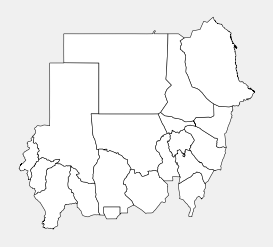

In [51]:
ax = sudan.plot(color='white', edgecolor='black')
ax.set_axis_off()
plt.show()

<AxesSubplot:>

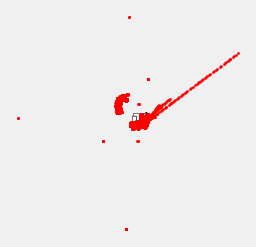

In [52]:
base = sudan.plot(color='white', edgecolor='black')
base.set_axis_off()
gdf.plot(ax=base, marker='o', color='red', markersize=5)


<AxesSubplot:>

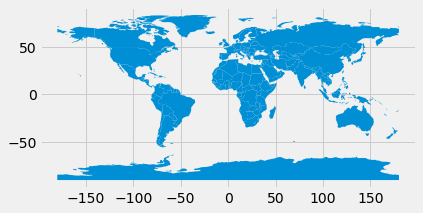

In [53]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

<AxesSubplot:>

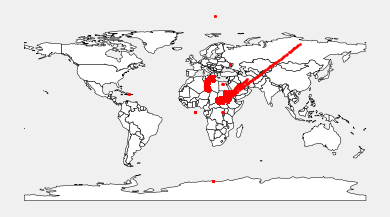

In [54]:
base = world.plot(color='white', edgecolor='black')
base.set_axis_off()
gdf.plot(ax=base, marker='o', color='red', markersize=5)

### Level 2 Administrative Boundaries

In [55]:
# upload file for district boundary shapes
sudan_2 = gpd.read_file('data/sdn_adm_cbs_nic_ssa_20200831_shp/sdn_admbnda_adm2_cbs_nic_ssa_20200831.shp')
sudan_2.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_AR,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1AR,ADM2ALT2AR,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,geometry
0,2.700165,0.351651,Abassiya,العباسية,SD07090,None,None,None,None,None,South Kordofan,جنوب كردفان,SD07,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((31.59964 12.61949, 31.61520 12.61538..."
1,9.507964,2.737059,Abu Hamad,أبو حمد,SD16008,None,None,None,None,None,River Nile,نهر النيل,SD16,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((33.55492 21.72171, 33.55607 21.72089..."
2,2.449820,0.318585,Abu Hujar,أبو حجار,SD14037,None,None,None,None,None,Sennar,سنار,SD14,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((34.00041 12.85744, 34.00541 12.85440..."
3,3.064410,0.501225,Abu Jabrah,أبو جابرة,SD05140,None,None,None,None,None,East Darfur,شرق دارفور,SD05,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((26.88396 10.53806, 26.82709 10.52610..."
4,6.577540,1.735855,Abu Jubayhah,أبو جبيهة,SD07088,None,None,None,None,None,South Kordofan,جنوب كردفان,SD07,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((32.12793 11.94509, 32.10658 11.94500..."


In [56]:
# 
sudan_2.rename(columns={"ADM2_EN": "District", 'ADM1_EN': 'State'}, inplace=True)
sudan_2.head()

,Shape_Leng,Shape_Area,District,ADM2_AR,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1AR,ADM2ALT2AR,State,ADM1_AR,ADM1_PCODE,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,geometry
0,2.700165,0.351651,Abassiya,العباسية,SD07090,None,None,None,None,None,South Kordofan,جنوب كردفان,SD07,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((31.59964 12.61949, 31.61520 12.61538..."
1,9.507964,2.737059,Abu Hamad,أبو حمد,SD16008,None,None,None,None,None,River Nile,نهر النيل,SD16,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((33.55492 21.72171, 33.55607 21.72089..."
2,2.449820,0.318585,Abu Hujar,أبو حجار,SD14037,None,None,None,None,None,Sennar,سنار,SD14,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((34.00041 12.85744, 34.00541 12.85440..."
3,3.064410,0.501225,Abu Jabrah,أبو جابرة,SD05140,None,None,None,None,None,East Darfur,شرق دارفور,SD05,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((26.88396 10.53806, 26.82709 10.52610..."
4,6.577540,1.735855,Abu Jubayhah,أبو جبيهة,SD07088,None,None,None,None,None,South Kordofan,جنوب كردفان,SD07,Sudan (the),السودان‎,SD,2020-03-11,2020-08-31,None,"POLYGON ((32.12793 11.94509, 32.10658 11.94500..."


In [57]:
# list all columns
list(sudan_2.columns)

['Shape_Leng',
 'Shape_Area',
 'District',
 'ADM2_AR',
 'ADM2_PCODE',
 'ADM2_REF',
 'ADM2ALT1EN',
 'ADM2ALT2EN',
 'ADM2ALT1AR',
 'ADM2ALT2AR',
 'State',
 'ADM1_AR',
 'ADM1_PCODE',
 'ADM0_EN',
 'ADM0_AR',
 'ADM0_PCODE',
 'date',
 'validOn',
 'validTo',
 'geometry']

In [58]:
# drop extraneous columns
sudan_2.drop(columns=['ADM2_AR', 'ADM2ALT1AR', 'ADM2ALT2AR', 'ADM2_PCODE', 'ADM1_AR', 'ADM1_PCODE', 'ADM0_AR', 'ADM0_PCODE','date', 'validOn', 'validTo'], inplace=True)
sudan_2.head()

,Shape_Leng,Shape_Area,District,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,State,ADM0_EN,geometry
0,2.700165,0.351651,Abassiya,None,None,None,South Kordofan,Sudan (the),"POLYGON ((31.59964 12.61949, 31.61520 12.61538..."
1,9.507964,2.737059,Abu Hamad,None,None,None,River Nile,Sudan (the),"POLYGON ((33.55492 21.72171, 33.55607 21.72089..."
2,2.449820,0.318585,Abu Hujar,None,None,None,Sennar,Sudan (the),"POLYGON ((34.00041 12.85744, 34.00541 12.85440..."
3,3.064410,0.501225,Abu Jabrah,None,None,None,East Darfur,Sudan (the),"POLYGON ((26.88396 10.53806, 26.82709 10.52610..."
4,6.577540,1.735855,Abu Jubayhah,None,None,None,South Kordofan,Sudan (the),"POLYGON ((32.12793 11.94509, 32.10658 11.94500..."


<AxesSubplot:>

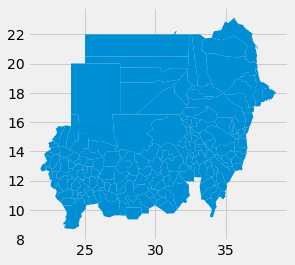

In [59]:
# quick plot to visualize district boundaries
sudan_2.plot()

In [60]:
# save geodataframe to file
sudan_2.to_file('data/sudan2.geojson', driver='GeoJSON')

In [61]:
gdf.head()

,year(العام),State,District,school_nam,MOEcode,location,lat,lon,Type,status2,Status,kindergarten,kinder_levle1,kinder_levle2,CYBB1,CYGB1,CYBB1NGK,CYGB1NGK,CYBB2,CYGB2,CYBB3,CYGB3,CYBB4,CYGB4,CYBB5,CYGB5,CYBB6,CYGB6,CYBB7,CYGB7,CYBB8,CYGB8,RYBB1,RYGB1,RYBB1NGK,RYGB1NGK,RYBB2,RYGB2,RYBB3,RYGB3,RYBB4,RYGB4,RYBB5,RYGB5,RYBB6,RYGB6,RYBB7,RYGB7,RYBB8,RYGB8,CYBBU1,CYGBU1,CYBBU1NGK,CYGBU1NGK,CYBBU2,CYGBU2,CYBBO1,CYGBO1,CYBBO1NGK,CYGBO1NGK,CYBBO2,CYGBO2,CYBBO3,CYGBO3,CYBBO4,CYGBO4,CYBBO5,CYGBO5,CYBBO6,CYGBO6,CYBBO7,CYGBO7,CYBBO8,CYGBO8,B1_Available_seats,B2_Available_seats,B3_Available_seats,B4_Available_seats,B5_Available_seats,B6_Available_seats,B7_Available_seats,B8_Available_seats,B1FORMS,B2FORMS,B3FORMS,B4FORMS,B5FORMS,B6FORMS,B7FORMS,B8FORMS,MTWHD,FTWHD,MTWUD,FTWUD,MTVNS,FTVNS,MS,ML,science_g1,science_g2,science_g3,science_g4,science_g5,science_g6,science_g7,science_g8,math_g1,math_g2,math_g3,math_g4,math_g5,math_g6,math_g7,math_g8,ar_g1,ar_g2,ar_g3,ar_g4,ar_g5,ar_g6,ar_g7,ar_g8,en_g1,en_g2,en_g3,en_g4,en_g5,en_g6,en_g7,en_g8,Seated_Girls,Seated_Boys,Graduated_Girls,Graduated_Boys,Permanent,reparation,Forms_Without_Classroom,Total_Clasrooms,Potable_Water_source,electricity,Fence,store,Latrines,Latrine_common,Latrine_male,Latrine_female,Teachers_In_Maze,school_feeding,feeding_fund,Girls_Feeding,Boys_Feeding,refugee_male,refugee_female,IDP_male,IDP_female,PTA_support_total,school_utensil,incentives,volunteers_sal,labors_sal,teachers_house_support,water_delivery,constructions,teachers_meal,photo_file,Head_Teacher_Name,Head_Teacher_Cellphone_Number,Avail_Seats,Tot_Mil_Vol,Total_Graduated,Total_Teach_Dipl,Total_Teach_Uni,Total_Teachers,Total_Students,Total_Repeaters,Total_Science,Total_Math,Total_Arabic,Total_English,Total_Under_5,Total_Over_14,geometry,Count
0,2018_2019,River Nile,Al Buhaira,شري بنين,10310221.0,rural,NaN,NaN,boys,yes,day_school,no,NaN,NaN,21,0,3,0,26,0,21,0,26,0,24,0,30,0,18,0,17,0,5,0,0,0,6,0,4,0,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,26,21,26,24,30,18,17,1,1,1,1,1,1,1,1,0,0,2,13,0,0,0,5,0,0,15,0,25,20,15,15,22,26,17,0,20,19,13,17,24,20,15,0,21,24,20,20,0,0,25,0,16,18,18,16,19,0,19,0,8,0,0,8,public_network,no_electricity,yes,no,yes,0,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1548571268172.jpg,فايزة محمد مصطفي,126972730,186,5,19,0,15,15,186,22,90,134,144,93,0,0,POINT (nan nan),1
1,2018_2019,Northern,Merwoe,فرح محمد بك القرانيه,11101301.0,urban,18.538573,31.840170,boys,yes,quaranic,no,NaN,NaN,0,0,0,0,21,0,0,0,0,0,18,0,18,0,18,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,21,0,0,18,14,9,11,0,1,0,0,1,1,1,1,1,2,4,90,0,1,0,4,0,0,0,0,6,9,7,11,0,20,0,0,13,9,7,10,0,18,0,0,12,6,7,12,0,0,0,0,5,5,20,6,2,0,2,0,6,2,0,8,public_network,network,yes,yes,yes,1,7,0,0,no,NaN,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1553166497687.jpg,صلاح سليمان الرفاعي محمد,121165932,73,5,2,3,94,97,104,13,33,59,55,36,0,4,POINT (31.84017 18.53857),1
2,2018_2019,Northern,Merwoe,مصطفى مبروك بنين,11101302.0,urban,18.544802,31.843675,boys,yes,day_school,no,NaN,NaN,27,0,0,0,0,0,33,0,33,0,42,0,38,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,27,0,33,33,42,38,22,0,1,0,1,1,1,1,1,1,0,0,5,10,0,0,0,3,0,0,13,15,20,13,12,0,25,15,17,15,19,22,16,0,26,16,14,13,15,11,12,0,0,0,10,15,17,15,12,0,0,0,0,0,9,0,0,9,public_network,network,yes,yes,yes,0,10,0,0,yes,indevedual,0,15,0,0,0,0,4000,2000,0,0,0,2000,0,0,0,1553160939260.jpg,مبارك الله جابو الحسن,122236404,195,3,0,0,15,15,195,19,73,129,107,69,0,2,POINT (31.84368 18.54480),1
3,2018_2019,Northern,Merwoe,سر الختم محمد الطيب بنين,11101303.0,rural,18.517909,31.820415,boys,yes,day_school,no,NaN,NaN,26,0,0,0,30,0,26,0,23,0,37,0,23,0,30,0,29,0,7,0,0,0,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,26,30,21,23,37,23,30,29,1,1,1,1,1,1,1,1,3,8,3,3,1,0,0,5,0,0,6,8,15,9,8,4,0,0,2,6,15,8,8,5,15,6,7,8,0,6,7,10,0,0,6,7,8,5,9,4,15,0,14,0,8,0,0,8,public_network,network,yes,yes,yes,1,

### More Feature Engineering

In [62]:
gdf.groupby('District')['Type'].value_counts()

District                         Type 
Abassiya                         mixed     58
                                 boys       8
                                 girls      7
Abu Hamad                        mixed     63
                                 girls     15
                                 boys      14
Abu Hujar                        mixed     42
                                 boys      19
                                 girls     17
Abu Jabrah                       mixed     23
                                 girls      7
                                 boys       6
Abu Jubayhah                     mixed     73
                                 boys      12
                                 girls     12
Abu Karinka                      mixed     14
                                 boys       7
                                 girls      6
Abu Kershola                     mixed     26
                                 boys      10
                                 girls   

In [63]:
gdf.groupby('District')['Fence'].value_counts()

District                         Fence
Abassiya                         no        61
                                 yes       12
Abu Hamad                        yes       59
                                 no        33
Abu Hujar                        no        50
                                 yes       28
Abu Jabrah                       no        30
                                 yes        6
Abu Jubayhah                     no        77
                                 yes       20
Abu Karinka                      no        24
                                 yes        3
Abu Kershola                     no        36
                                 yes        8
Abu Zabad                        no        56
                                 yes       39
Abyei                            yes       32
                                 no        31
Ad Dabbah                        no        34
                                 yes        4
Ad Dali                          no      

### Demographic Information

In [ ]:
demo = pd.read_excel('data/sudan_hno-2021_baseline-data.xlsx', header=[0,1])
demo.head()

STATE PCODE       STATE LOCLITY PCODE          LOCALITY  \
  #adm1+pcode  #adm1+name   #adm2+pcode        #adm2+name   
0        SD19   Abyei PCA       SD19101    Abyei PCA area   
1        SD15  Aj Jazirah       SD15034       Al Hasahisa   
2        SD15  Aj Jazirah       SD15035         Al Kamlin   
3        SD15  Aj Jazirah       SD15036        Al Manaqil   
4        SD15  Aj Jazirah       SD15031  Janub Aj Jazirah   

  Population\n2020 Projection Population\n2020 Projection plus Refugees  \
            #population+total                #population+total+refugees   
0                      151288                                    151288   
1                      901173                                    902643   
2                      594492                                    595557   
3                      814049                                    814805   
4                      828804                                    829586   

          Male (51%)       Female (49%) Children < 5 year (14%)  \
  #population+male\t #population+female      #population+under5   
0              77157              74131                   24206   
1             459598             441575                  126164   
2             303191             291301                   83229   
3             415165             398884                  113967   
4             422690             406114                  116033   

  Children < 19 yrs (48%) Women and girls 15-49 yrs (26%)    Elderly >65 (2%)  \
     #population+children              #population+female #population+elderly   
0                   72618                           39335                3026   
1                  432563                          234305               18023   
2                  285356                          154568               11890   
3                  390744                          211653               16281   
4                  397826                          215489               16576   

  People with disability (15%)   IDPs\nAugust 2020 Returnees (2018-2019)  \
          #population+disabled #affected+dispalced   #affected+returnees   
0                        22693                   0                     0   
1                       135176                   0                     0   
2                        89174                   0                     0   
3                       122107                   0                     0   
4                       124321                   0                     0   

       Returnees\n2003-2017  \
  #affected+returnees+total   
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   

  South Sudanese\n31-Dec-2020\nNeed to be updated with 2021  \
                                         #affected+refugees   
0                                                  0          
1                                               1353          
2                                               1060          
3                                                748          
4                                                778          

  Non-SS refugees and Asylum seekers\n31-Dec-2020\nNeed to be updated with 2021  \
                                                             #affected+migrants   
0                                                  0                              
1                                                118                              
2                                                  5                              
3                                                  8                              
4                                                  4                              

  Vulnerable Residents\nDecember 2018 IPC phase 4\nProjection Dec 2020  \
                               VULR18                   #affected+IPC4   
0                               37822                                0   
1            

In [66]:
%%html
<div class='tableauPlaceholder' id='viz1639463677723' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;SudaneseSchoolDatasetAnalysis&#47;Dashboard1?:language=en-US&amp;:embed=true' /> <param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1639463677723');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1366px';vizElement.style.height='818px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1366px';vizElement.style.height='818px';} else { vizElement.style.width='100%';vizElement.style.height='2200px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>